In [45]:
import pandas as pd
import numpy as np

In [46]:
st_data=pd.read_csv('D:/ML_practice/startUp_LinearReg/50_Startups.csv')

In [47]:
st_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
st_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [49]:
st_data.duplicated().any()

False

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([     0.  ,      0.  ,      0.  ,   1903.93,  28334.72,  35534.17,
          45173.06,  46085.25,  88218.23,  91131.24, 107138.38, 118148.2 ,
         127716.82, 134050.07, 137962.62, 140574.81, 148001.11, 164470.71,
         172795.67, 174999.3 , 18

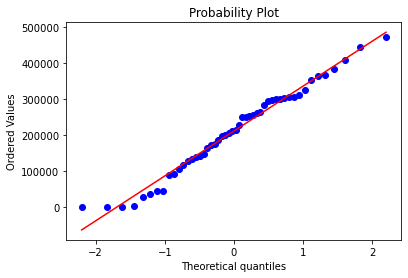

In [50]:
from scipy import stats
import scipy as scipy
import matplotlib.pyplot as plt
stats.probplot(st_data['Marketing Spend'], plot=plt)

In [51]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [52]:
st_data.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [53]:
st_data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
x_data=st_data.iloc[:,:-1].values
y_data=st_data.iloc[:,4].values

In [56]:
x_data[:4]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York']], dtype=object)

In [57]:
y_data[:4]

array([192261.83, 191792.06, 191050.39, 182901.99])

<AxesSubplot:>

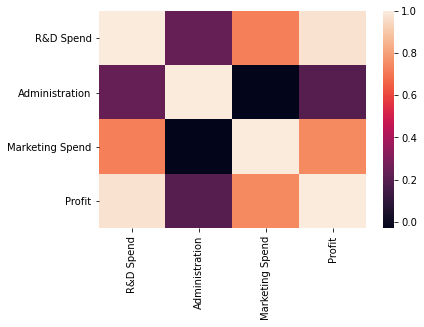

In [58]:
sns.heatmap(st_data.corr())

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#LabelEncoder=LabelEncoder()
#x_data[:,3]=LabelEncoder.fit_transform(x_data[:,3])



# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = OneHotEncoder()

# 2. FIT
enc.fit(x_data)

# 3. Transform
x_data = enc.transform(x_data).toarray()
x_data.shape


x_data[:5]




array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [66]:
s_model=LinearRegression().fit(x_train,y_train)

In [67]:
pred=s_model.predict(x_test)

In [68]:
pred[:5]

array([126306.42340993,  84713.65693305,  98525.85095294,  46276.55650201,
       128734.55023304])

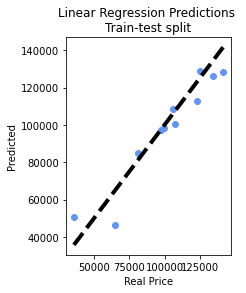

In [69]:
#Predictions plot
plt.figure(figsize=(10,4))

def plot_regression(real, predicted, color, title):
  plt.scatter(real, predicted, color=color)
  plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
  plt.xlabel('Real Price')
  plt.ylabel('Predicted')
  plt.title(title)


#Real price vs train-test predictions plot (without outliers)
plt.subplot(131)
plot_regression(y_test, pred, 'cornflowerblue', 'Linear Regression Predictions \nTrain-test split')
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
#R2 coefficient, MAE and MSE measures
print('Test split evaluation \n',
      'Coefficient of determination R2: %.3f \n' % r2_score(y_test, pred))

Test split evaluation 
 Coefficient of determination R2: 0.898 



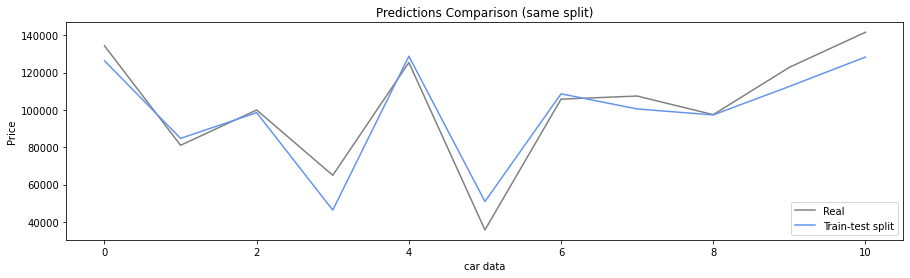

Euclidean distance between prices
- Real vs train-test: 31746.691


In [71]:

import numpy as np
#Predictions comparison plot
plt.figure(figsize=(15,4))

plt.plot(np.array(y_test), color='grey', label='Real')
plt.plot(pred, color='cornflowerblue', label='Train-test split')
plt.xlabel('car data')
plt.ylabel('Price')
plt.title('Predictions Comparison (same split)')
plt.legend(loc=4)
plt.show()


from scipy.spatial import distance


#Predictions distance (in general)
print('Euclidean distance between prices')
print('- Real vs train-test: %.3f' % distance.euclidean(y_test, pred))

In [72]:
print(s_model.coef_)

[ 0.80028565 -0.06948501  0.03192228  3.30740258]


In [73]:
print(s_model.intercept_)

54035.4692310616


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8978694181380115